# Physics 300 
## Computational Physics I (Fall 2018)
## BPB-248, Mon/Wed 02:30 - 03:45 pm 

|Instructor| Prof. Qiang Zhu|
|--|-------------------------------|
|Email | qiang.zhu@unlv.edu|
|Website|http://www.physics.unlv.edu/~qzhu/|
|Office| BPB 232|
|Office hours | Mon/Wed 03:45 - 05:00 pm |


# 11 Random Numbers

## 11.1 Gaussian distribution
A common problem in physics calculation is the generation of random numbers from _Gaussian distribution_:

$$ p(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp(-\frac{x^2}{2\sigma^2})$$

in which $\delta$ is the width, or standard deviation of the distribution.

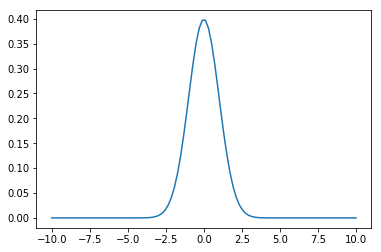

In [1]:
%matplotlib inline  


# plot Gaussian distribution 1-d

import matplotlib.pyplot as plt
import numpy as np
from math import pi

def gauss(x, sigma):
    p = 1/np.sqrt(2*pi)*sigma*np.exp(-x**2/2/sigma**2)
    return p

sigma = 1
x = np.linspace(-10,10,100)
plt.plot(x, gauss(x, sigma))
plt.show()

Such Gaussian distribution could also be extended to 2 dimensional

$$ p(x, y) = A \cdot \exp(- (\frac{x^2}{2\sigma_x^2} + \frac{y^2}{2\sigma_y^2} ))$$



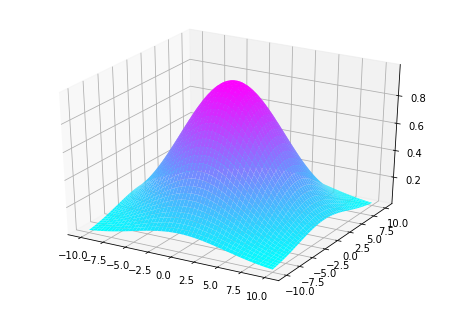

In [13]:
# plot Gaussian distribution 2d
%matplotlib inline
#matplotlib notebook


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from math import pi

def gauss(x,y, sx, sy):
    p = np.exp(-x**2/2/sx**2 -y**2/2/sy**2)
    return p

sigma = 1
nx = np.linspace(-10,10,100)
ny = np.linspace(-10,10,100)
x,y = np.meshgrid(nx,ny)
z = gauss(x, y, 5, 5)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x,y,z, cmap='cool')
#ax.plot_wireframe(x,y,z, cmap='hot')
#plt.show()
#ax.contour(x,y,z, cmap='hot')
plt.show()

## 11.2 The integral of Gaussian distribution

How shall we calculate the integral of the Gaussian function? 

$$ p(x) = \frac{1}{\sqrt{2\pi}}\exp(-\frac{x^2}{2})$$


Suppose we don't know how to solve it analytically, let's use what we have learned in the previous classes.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def Trapezoid(f, start, end, parts=500):
    """    Trapezoid sum rule    """

    x = np.linspace(start, end, parts+1)
    dx = (end-start)/parts
    return ( 1/2*f(x[0]) + sum(f(x[1:-1])) + 1/2*f(x[-1]) )*dx

f = lambda x: 1/np.sqrt(2*pi)*np.exp(-x**2/2) 
Trapezoid(f, -10, 10)

0.9999999999999996

## 11.3 Analytical solution

Imagine that we have two independent random numbers x and y, 
both from Gaussian distribution.

$$ p(x) = \exp(-\frac{x^2}{2})$$

$$ p(y) = \exp(-\frac{y^2}{2})$$

$$ 
\begin{aligned}
I^2 = & \int_{-\infty} ^\infty p(x) dx \int_{-\infty} ^\infty p(y) dy \\
    = & \int_{-\infty} ^\infty \int_{-\infty} ^\infty p(x)p(y)dxdy \\
    = & \int_{-\infty} ^\infty \int_{-\infty} ^\infty \exp(-\frac{x^2+y^2}{2}) dxdy
\end{aligned}
$$

In this case, we could change it to polar coordinates from (x,y) to (r, $\theta$),

$$
\begin{aligned}
I^2 = & \int_0 ^{2\pi} \int_{0} ^\infty \exp(-\frac{r^2}{2})r dr d\theta \\
    = & 2\pi \int_{0}^{-\infty} \exp(-\frac{r^2}{2})r dr \\
    = & 2\pi [\exp(-\frac{r^2}{2}) ]^{0}_{-\infty} \\
    = & 2\pi
\end{aligned}
$$


## 11.4 More complex functions
The integral techniques which we learned from the previous class will become problematic if the function varies infinitely fast at some stages.

Suppose that we want to evalute the integral
$$ I = \int_0^2 \sin^2(\frac{1}{x(2-x)})dx $$


/Users/qiangzhu/.pyenv/versions/3.7.0/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/qiangzhu/.pyenv/versions/3.7.0/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sin
  


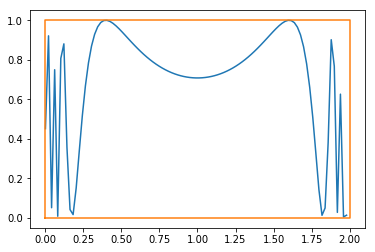

In [4]:
# complex functions
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return np.sin(1/x/(2-x))**2


# plot the f(x)
x = np.linspace(0.001,2,100)
plt.plot(x, f(x))

# plot the boundary
plt.plot([0,0,2,2,0],[0,1,1,0,0])
plt.show()

### 11.4.1 Calculate the integral by probability 
Here is a simple way of solving this problem. From the curve, we approximately could draw a rectangle to cover the curve in which x=[0,2], y = [0,1]. The area of the rectangle is simply $A$=2. And the area under the curve is $I$ which appears to be difficult to solve. If we choose a point uniformly at random in the rectangle, What's the probability that the point falls into the region under the curve? It is obviously that $p$ = $I$/A. So here is our scheme:
- generate a large number of $N$ random points in the bouding rectangle
- check each one to see if it is under the curve, and keep a count of the number for this ($k$)
- according to $p = k/N = I/A$, we get $I=kA/N$

The techniue goes by the appealing name of _Monte Carlo integration_, after the famous casino twon in Monaco.
It uses a random processs to calculate the larly useful for problems like this one where the integrand is pathological
and also for multiple integrals in high dimensions.



In [5]:
# MC intergral
import matplotlib.pyplot as plt
from math import sin
from random import random

def f(x):
    return sin(1/x/(2-x))**2

def MC(N):
    count = 0
    for i in range(N):
        x = 2*random()
        y = random()
        if y<f(x):
            count += 1
    I = 2*count/N
    return I


In [6]:
print(MC(100000))

1.45452


### 11.4.2 Error analysis
The main disadvantage of the Monte Carlo method is that it doesn't give very accurate results. 
The probability that a single point falls below the curve is $p=I/A$, while the chance that it falls
above the curve is $1-p$.
The probability that a particular $k$ of our points fall below and the remaining $N-k$ fall above is $p^k(1-p)^{N-k}$.
But there are many ways to choose the $k$ points out of $N$ total. So the total $P(k)$ that we get $k$ points below the curve is 

$$ P(k) = \binom{N}{k}  p^k(1-p)^{N-k}$$

which is called the _binomial distribution_. The variance of this distribution is:

$$ <k^2> = \sum_{k=0}^{N}kP(k) $$
$$ <k>^2 = \sum_{k=0}^{N} = N(N-1)p^2 + Np $$
$$ <k^2> - <k>^2 = Np - N(N-1)p^2 + Np = Np(1-p) $$

Such quantity could be used to measure the deviation of the data.
Moreover, it could be normalized by the number of points, which leads to the _standard deviation_

$$\delta = \sqrt{<k^2> - <k>^2}/N = \sqrt{\frac{p(1-p)}{N}}$$

The could serve as a metric for the error values. It varies with $N$ as $N^{-1/2}$, which means the accuracy 
improves if we take more random samples. This means we might need to do a lot of sampling in order to get
the satisfactory convergence.

## 11.5 Homework

#### 1, Monte Carlo Integral

Calculate the area shaded in green
![Homework](https://raw.githubusercontent.com/qzhu2017/2017-cmp/master/img/MC1.png)

#### 2, Error Analysis
Try to do the intergral many times (100) for different $N$ values (100, 1000, 10000, 100000), collect the data and calculate its standard varaince.


## 11.6 Appendix

Below is a script used to generate two circle intersection shown in homework 1.

```python
import matplotlib.pyplot as plt
import numpy as np

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')

x1 = np.linspace(0,2,100)
y1 = np.sqrt(1-(x1-1)**2)
ax1.plot(x1,y1,'k')

y2 = 2-np.sqrt(4-x1**2)
ax1.plot(x1,y2,'k')

ax1.set_xlim(0,2)
ax1.set_ylim(0,2)
ax1.fill_between(x1, y1, y2, where=y1>y2, facecolor='green')

plt.show()
#plt.savefig('MC1.png')
```